__Permutation Test__  
Average non-pathological brain age gap vs. average pathological brain age gap

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
orig_df = pd.read_csv('/home/jovyan/220824_5fcv_huber.csv', index_col=0)

In [3]:
orig_df = orig_df[orig_df.split=='valid']

In [4]:
orig_df['gap'] = orig_df.y_true - orig_df.y_pred
orig_df_mean = orig_df.groupby('pathological').mean()
orig_mean_gap_diff = orig_df_mean.loc[False, 'gap'] - orig_df_mean.loc[True, 'gap']
orig_mean_gap_diff

-2.073600274533112

In [5]:
gaps = orig_df['gap'].to_numpy()

In [11]:
n_repetitions = 100000

In [12]:
mean_gap_diffs = []
for n in range(n_repetitions):
    choices = np.random.choice(2, len(gaps))
    gaps0 = gaps[choices==0]
    gaps1 = gaps[choices==1]
    mean_gap_diff = gaps0.mean() - gaps1.mean()
    mean_gap_diffs.append(mean_gap_diff)

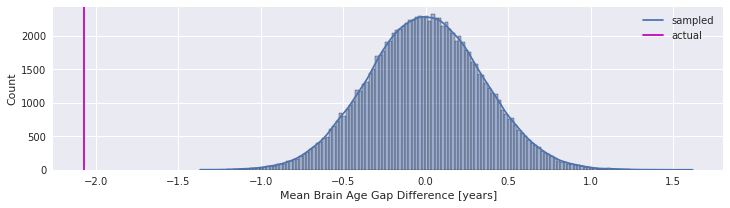

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax = sns.histplot(x=mean_gap_diffs, kde=True)
ax.axvline(orig_mean_gap_diff, c='m')
ax.set_xlabel('Mean Brain Age Gap Difference [years]')
ax.legend(['sampled', 'actual'])
fig.savefig('/home/jovyan/permutation_test.png', bbox_inches='tight', dpi=300)

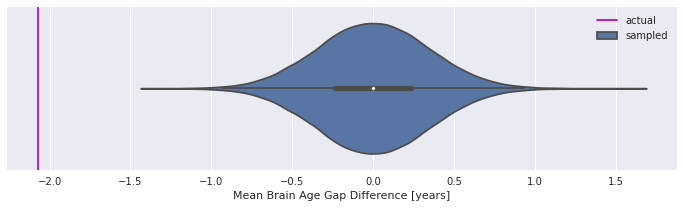

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.axvline(orig_mean_gap_diff, c='m')
ax = sns.violinplot(x=mean_gap_diffs, kde=True)
ax.set_xlabel('Mean Brain Age Gap Difference [years]')
ax.legend(['actual', 'sampled'])
fig.savefig('/home/jovyan/permutation_test.png', bbox_inches='tight', dpi=300)